# Patrick Tom Chacko

An exploratory data analysis of weather conditions in Irish weather, data is pre-processed then the summary statistics are looked up, data manipulation takes place and finally the required results are displayed in graphs and tables to easily understand the analysis. 
This analysis could be useful for airports to understand the passenger trend varying according to weather, as well as help them to increase profit by forecasting the operational cost, labor cost, and miscellaneous expenses according to the 

Project done in Python, Jupyter Notebook

In [4]:
import pandas as pd     #importing relevant modules and libraries as short forms
import numpy as np      #so that we can use short forms instead of library names
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file = open('weather.csv')
lines = [line for line in file]
def terminology():
    print(lines[0:11])

Step 1. <br>
-Load dataset as pd dataframe<br>
-Describe the data<br>
-Temporal resolution of data<br>

In [6]:
#Loading dataset as pd.dataframe
weather_df = pd.read_csv('weather.csv',skiprows = 11, header = 0)  #by looking at our dataset we can identify where our req data is starting and if it has header
weather_df.head()                                       

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
0,1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6
1,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4
2,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6
3,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6
4,5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0


<b>Description of weather_df</b>

I viewed my dataset and saw the observations start from row 12 onwards including the header, 
so I skipped the first 11 rows and loaded the dataset with header as my first row. 
My dataframe has 10 columns and 1095 rows or observation. 
Since the dataset was in comma - separated values I could read in the data from pandas built in function read_csv


<b>Number of Years</b>

Let us pull out the 'year' column from df and compute

In [7]:
weather_df['year'].unique()

array([2021], dtype=int64)

So from here we can see the dataset has 1095 observations of the year 2021, Therefore only 1 year of recording ~ 2021

<b>Temporal resolution of data </b>

Definition. The time period between consecutive observation. 
Here from my head method I can see that the time period between each observation is a day, to confirm this let us also call the rows at end.

In [8]:
weather_df.tail(5)

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
1090,27,dec,2021,Cork Airport,8.9,6.6,3.9,10.9,32.0,0.0
1091,28,dec,2021,Cork Airport,9.3,6.7,5.3,9.1,31.0,0.3
1092,29,dec,2021,Cork Airport,13.0,7.5,11.5,13.5,35.0,3.5
1093,30,dec,2021,Cork Airport,12.2,11.1,24.3,16.7,37.0,0.0
1094,31,dec,2021,Cork Airport,12.1,11.0,1.4,16.5,38.0,0.0


Hence we can confirm that the Temporal resolution of the observations in our data is 1 day.

<b>Step 2</b>

-Determine how many missing values there are in each column of the dataset<br>
-Can you think of a reason why these values are missing?<br>
-Discuss different strategies for filling the missing values,<br>
-highlighting the advantages and disadvantages of each strategy<br>

In [9]:
weather_df.isnull().sum(axis =0)

day        0
month      0
year       0
station    0
maxtp      2
mintp      2
rain       4
wdsp       1
hg         3
sun        2
dtype: int64

<b> Number of missing values </b>

We can see there are 14 missing values in total

1 in column wdsp

2 each in columns (maxtp,mintp,sun)

3 in column hg

4 in column rain

<b>Why missing values?</b>

Maybe because of the equipment meauring it might not be functioning that day<br> or 
Character was not read properly by OCR<br> or 
While porting files from different formats values got missed out<br>


<b>Different strategies with advantages and disadvantages of dealing with missing values</b>

1) Use .dropna() met of DataFrame advantage retains the integrity of data but the disadvantage is that it will drop the whole obs even if 1 col entry is NaN , what if that col didn't matter to us

2) Use .reindex(data, fill =value) method of dataframe which can fill in the missing values with values that user provides, its advantageous for working on small dataset where we know the missing values but on large datasets its disadvantageous to fill in individually the missing values. The alternative parameters method = ffill forward fills the missing value with the valu above it and bfill fills value of the next available non missing value. These methods are helpful in specific cases.

3) Use fillna()  met of DataFrame advantage is it won't drop any observation but disadvantage is it fills the values with user inputs which can vary user to user. Using fillna(mean(df)) advantage replaces all the missing numerical values with the mean of that column (without NaN). This is better approach as missing values won't affect the distrbution of data and every user will work on same dataset



<div style="page-break-before: always" >
Specific details of any record<br>
1. How many different weather stations are included in the data set?<br>
2. At what station and on what date was the lowest minimum air temperature recorded?<br>
3. At what station and on what date was the largest amount of rain recorded?</div>

Let us see how many different weather stations are included in dataset

In [10]:
weather_df['station'].unique()

array(['Dublin Airport', 'Shannon Airport', 'Cork Airport'], dtype=object)

<b>Number of weather stations</b><br>

We can see from the output that there are 3 different weather stations included in our dataset, which are Dublin Airport, Shannon Airport and Cork Airport.

I am going to check what abbreviations are used for minimum air temperature and amount of rain

In [11]:
terminology()

['day: day of measurement,,,,,,,,,\n', 'month: month of measurement,,,,,,,,,\n', 'year: year of measurement,,,,,,,,,\n', 'station: location of measurement     ,,,,,,,,,\n', '"maxtp: Maximum Air Temperature (C)\t  ",,,,,,,,,\n', 'mintp: Minimum  Air Temperature (C),,,,,,,,,\n', 'rain: Precipitation Amount (mm),,,,,,,,,\n', 'wdsp: Mean Wind Speed (knot),,,,,,,,,\n', 'hg: Highest Gust (knot),,,,,,,,,\n', 'sun: Sunshine duration (hours),,,,,,,,,\n', ',,,,,,,,,\n']


In [12]:
weather_df[weather_df['mintp']==weather_df['mintp'].idxmin(axis =0)]

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
129,10,may,2021,Dublin Airport,15.3,8.0,3.6,10.8,27.0,2.6
473,19,apr,2021,Shannon Airport,12.2,8.0,3.4,7.3,18.0,0.0
499,15,may,2021,Shannon Airport,13.0,8.0,20.7,5.6,18.0,1.7
514,30,may,2021,Shannon Airport,22.6,8.0,0.0,5.2,18.0,10.9
678,10,nov,2021,Shannon Airport,12.6,8.0,0.2,2.8,9.0,0.4
723,25,dec,2021,Shannon Airport,11.9,8.0,13.3,7.9,21.0,0.9
757,28,jan,2021,Cork Airport,10.9,8.0,2.1,13.8,32.0,0.0
887,7,jun,2021,Cork Airport,15.2,8.0,0.5,8.2,21.0,2.8


We can see that the minimum air temperature was observed on 8th row, we can extract that row or use another way like I have done below

In [13]:
weather_df[weather_df['mintp']==weather_df['mintp'].min()]

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
8,9,jan,2021,Dublin Airport,2.4,-5.9,0.0,6.5,19.0,6.8


<b>Observation 1 </b><br>
Therefore the minimum air temperature was noted in Dublin Airport on 9 January 2021

Now let us check similarly for largest amount of rain

In [14]:
weather_df[weather_df['rain']==weather_df['rain'].max()]

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
1029,27,oct,2021,Cork Airport,14.7,12.4,50.1,16.4,36.0,0.0


<b>Observation 2 </b><br>
From our code we can observe that largest amount of rain was recorded in Cork airport on 27 October 2021

In [15]:
weather_df['rain'].idxmax()       #Verifying the index number using idxmax()

1029

Step 3 Let's create a numerical summary <br>
-Create a numerical summary (mean, standard deviation, minimum, maximum, etc.) weather measurements. <br>
-Discuss and interpret your results<br>

<b></b><br>
Firstly I am going to remove other columns which are not weather measurements<br> <br>
Call the describe() method on resutlting dataframe

In [16]:
weather_df.drop(columns = ['day','year','month','station']).describe()

,maxtp,mintp,rain,wdsp,hg,sun
count,1093.000000,1093.000000,1091.000000,1094.000000,1092.000000,1093.000000
mean,13.732662,6.950046,2.596242,8.587020,22.863553,4.036780
std,5.107554,4.687423,4.864790,3.705469,8.396710,3.958998
min,0.600000,-5.900000,0.000000,1.900000,7.000000,0.000000
25%,10.200000,3.400000,0.000000,6.000000,17.000000,0.300000
50%,13.400000,7.100000,0.300000,7.900000,21.000000,2.900000
75%,17.600000,10.700000,3.050000,10.600000,28.000000,6.600000
max,29.600000,18.700000,50.100000,26.300000,64.000000,15.200000


<b>Interpretation of results</b><br>
count - Frequency (How many observations are recorded)<br>
We know that there are in total 1095 observations but here in 'count' all of the columns of wind measurment are showing less that 1095 because there are missing values.

mean - It removes the missing value and gives us 1 numeric value that interprets the data as a single point, so for 'maxtp' I can say that, on an Average the maximum air temperature of all the observations is equal to 13.732 C, similarly for other columns

std - std stands for standard deviation, standard deviation is a numeric value that gives us the spread of data, higher the numeric value implies the data is hugely spread out whereas less numeric value suggests that the observations are compact about its mean. For example in 'mintp' I can say that on an average approximately 65% of datapoints can be found in the interval [mean-std, mean+std], similarly for other columns

min - min gives the minimum value in the column by default (axis = 0, by default for all observations here). For 'rain' column I can say that the minimum observed value is 0mm, which happens in the case when there was no rain observed, hence similarly we can interpret for other columns.

25% - 25th percentile or the 1st quartile, the numeric value corresponding to which 25% of total values have an observed value below that numeric value. For example, in 'wdsp' column I can say that 25% of 1095 (approx 273) observations have their recorderd mean of windspeed less than 6 knot, similarly for other columns.

50% - 50th percentile or the median or the 2nd quatile, is the numeric value corresponding to this number half of the datapoints have observed value for that column less than than numeric value. For example in 'hg' we can say half of the observations(approx 547) have highest gust value less than 21 knot and the other 548 have gust speed more than 21 knot.

75% - 75th percentile or the 3rd quartile, is a numeric value corresponding to which 75% of total values have an observed value below that numeric value. For example, in 'sun' column, I can say 75% of 1095 ( 821 observations approx) have sunshine duration recorded less than 6.6 hrs, similarly for other columns

max - Maximum or 100th percentile is the numeric value denoting the largest observation of the column in all observations.<br>
In 'maxtp' column we can say the highest observation in maximum air temperature is 29.6 C (Celsius)<br>
In 'mintp' column we can say the highest observation in minimum air temperature is 18.7 C <br>
In 'rain' column we can say the highest observation in precipitation amount is 50.1 mm <br>
In 'wdsp' column we can say the highest observation in Mean Wind Speed is 26.3 knot <br>
In 'hg' column we can say the highest observation in highest gust is 64 knot<br>
In 'sun' column we can say the highest observation in sunshine duration is 15.2 hours<br>

In [17]:
terminology()      #I keep forgetting the abbreviation, so I have made this function which reminds me the full forms

['day: day of measurement,,,,,,,,,\n', 'month: month of measurement,,,,,,,,,\n', 'year: year of measurement,,,,,,,,,\n', 'station: location of measurement     ,,,,,,,,,\n', '"maxtp: Maximum Air Temperature (C)\t  ",,,,,,,,,\n', 'mintp: Minimum  Air Temperature (C),,,,,,,,,\n', 'rain: Precipitation Amount (mm),,,,,,,,,\n', 'wdsp: Mean Wind Speed (knot),,,,,,,,,\n', 'hg: Highest Gust (knot),,,,,,,,,\n', 'sun: Sunshine duration (hours),,,,,,,,,\n', ',,,,,,,,,\n']


Low Code Representation.<br>
-Create a graphical summary for each of the weather measurements. <br>
-Discuss your plots in relation to the summary statistics found in question 4.<br>
-Label figures<br>

<b>Step 1</b><br>
Import the relevant modules and libraries (I have done this at beginning)<br>

<b>Step 2</b><br>
Give title and label the Axes


Text(0, 0.5, 'Observed value')

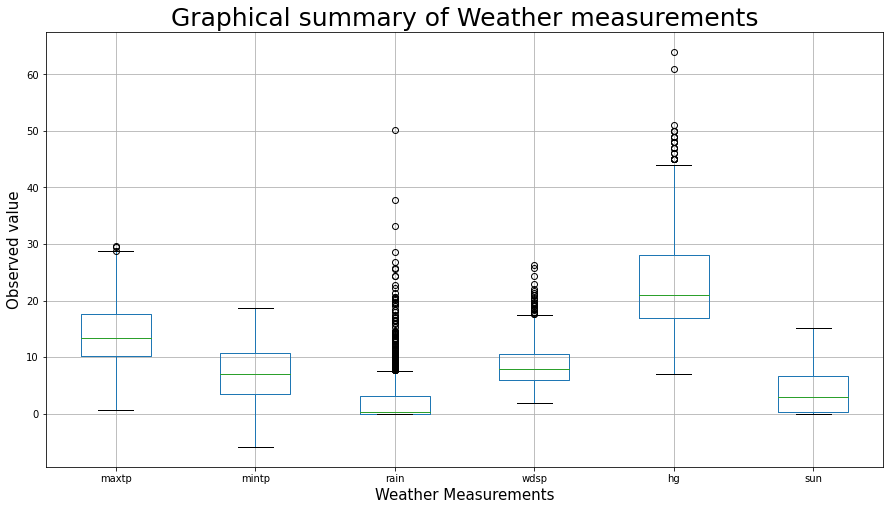

In [18]:
plt.figure(figsize=(15,8))
weather_df.drop(columns = ['day','year','month','station']).boxplot()
plt.title('Graphical summary of Weather measurements',fontsize = 25)
plt.xlabel('Weather Measurements',fontsize = 15)
plt.ylabel('Observed value',y=0.5,fontsize = 15)

<b>Step 3</b><br>
Discussion of plot relation to summary statistics<br><br>

Although numerical summary gives us the important Summary details but looking at the same information graphically helps us to understand the data more quickly and in a concise manner.<br><br>

Looking at the boxplots we can see if the line inside the box(median) is exactly at the middle implying symmetrical distribuion between 1st and 3rd quartile, which can be observed in the boxplot corresponding to <b>'sun'</b>.<br>

<br>Looking at the whiskers (the vertical line extending on both sides) gives us the spread of data, and similiar lengths on both sides can be interpreted as symmetrical distribution throughout which can be seen in boxplot corresponding to <b>'mintp'</b>.<br><br>

Looking at the lines on end of the whiskers tell us the InterQuartile range (1.5 * range(1st quartile,3rd quartile)), for example the lower line at boxplot corresponding to <b>'maxtp'</b> interprets that lowest maximum air temperature observed is approximately 1C (deg celsius). <br><br>

Looking at the points above the line in boxplot corresponding to <b>'wdsp'</b> can tell us about the outliers, the observations which have extreme observed values. <br><br>

Looking at the outliers and their density can tell us how much of the data is actually in the extreme region (or outside our boxlot) as comparing with boxplot corresponding to <b>'rain'</b> we can see the density of outliers as well as the spread of outliers. The small box suggests that 50% of observation have observed rain values less than 1mm but the other 50% have observed high amount of rain.<br><br>

Looking at the boxplot corresponding to <b>'hg'</b> tells us that it is important to look at the position of the boxplot and check the corresponding values at Y-axis gives us the understanding of our observation.<br><br>
Graphical summary is the plotting of our numerical summary so there is no differences in observed values.

Further graphs.<br> -Produce a scatter plot of the maximum temperature versus the minimum temperature<br> 
-and colour your points based on month.<br>
-Interpret your plot. (8 marks)<br>
-Label figures<br>

<b>Step 1</b><br>
Import the relevant modules and libraries (I have done this at beginning)<br>
<br><b>Step 2</b> Produce the appropriate Plot

Text(0.5, 1.0, 'Min Air Temperature vs Max Air Temperature')

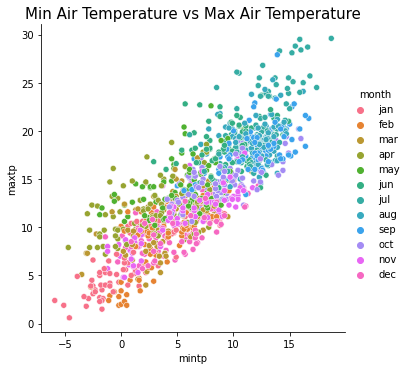

In [46]:
sns.relplot(x = 'mintp',y = 'maxtp',data = weather_df, hue = 'month')
plt.title('Min Air Temperature vs Max Air Temperature',fontsize = 15)

<b>Step 3</b><br>Interpretion of the plot<br><br>


First of all we can observe points, the x axis corresponds to minimum air temperature at a particular day and the y axis corresponds to the maximum air temperature at that day<br><br>

We can also observe there is a strong positive correlation between maximum air temperature and minimum air temperature stating that with increase in minimum air temperature there is increase in maximum air temperature which makes sense, as in summer the max and min air temperature are higher as its hot but in winter both are low due to days being colder.<br><br>

We can also observe this from the graph that the months with November, December ,January and February are grouped together and are towards the lower temperature range(having both max and min temperature at less value meaning colder days).<br><br>

Whereas the months June, July, August and September are grouped together and are seen to take the higher temperature range(both max and min are higher stating warmer days)<br><br>

The rest of the months appear seem to take intermediate value, ignoring slight variations we can group the majority of data as Winter months and Summer months with Intermediate months falling in either of the groups.

<b>Data Manipulation</b>.
 <br> 
-Compute the daily temperature range, <br>
-and add this as an additional variable to your DataFrame. <br>
-Print out the first few rows of your DataFrame to show that the column has been added correctly. (5 marks)<br>
-Steps for computing<br>

<b>Step 1</b> Compute Daily temp range<br>
Since we know the maximum air temperature is going to be greater than minimum air temperature we can find the temperature change by computing the difference between the max and the min air temperature of the day

Temperature range =  maxtp(day_i) - mintp(day_i)


Let us compute the daily temperature range and add it as another column in the dataframe.<br>
<br><b>Step 2</b> : Add the column<br>
Column in dataFrame can be made easily.

In [20]:
weather_df['temp_diff'] = weather_df['maxtp'] - weather_df['mintp'] 
weather_df.head()

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,temp_diff
0,1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6,6.9
1,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4,5.9
2,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6,6.4
3,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6,3.1
4,5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0,4.0


<b>Step 3 Print and Verify</b><br>


Our column temp_diff has been created and it is stating the range of temperature observed in a Day.

<B>Plot for 3 variables</B><br> 
-Plot the daily temperature range versus the hours of sunlight per day, colouring the points based on the weather station.<br> -Interpret your plot. (8 marks)<br>
-Label figures

<b>Step 1</b><br>
Import the relevant modules and libraries (I have done this at beginning)

To correctly understand the axis length I am going to compute the maximum value of my parameters

In [44]:
weather_df['temp_diff'].max()

17.1

In [45]:
weather_df['sun'].max()

15.2

<b>Step 2 </b><br> Adjust the axes length, if not done in the plot<br>

If the axes length are not adjusted properly we can make use of our xtick and ytick to include our datapoints. 

Text(35.29421875, 0.5, 'Duration of sunshine')

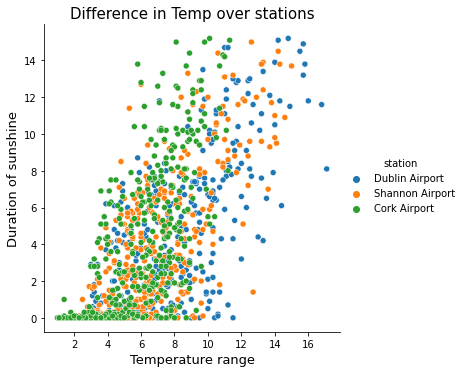

In [42]:
sns.relplot(x = 'temp_diff',y = 'sun',data = weather_df, hue = 'station')    # hue ~ color
plt.title('Difference in Temp over stations',fontsize = 15)
plt.xlabel('Temperature range',fontsize =13)
plt.ylabel('Duration of sunshine',fontsize =13)             #increasing fontsize because couldn't read properly from plot

<b>Step 3</b><br>Interpretation of the plot<br><br>

From this plot I can observe <br>

The higher the point goes vertically (upwards) it states that the duration of sunshine received is higher, but higher the point travels horizontally (rightwards) it states there was higher temperature difference on that day. This coordinate system understanding will help us understand what is denoted by the position of the point.<br><br>

All the airports have majority of observations lying under 12C of daily temperature difference and 10 hrs of daily sunshine <br> <br>

Lots of green dots corresponding Cork Airport crowds below 10C of daily temperature range stating that the temperature difference in a day was the smallest in Cork Airport, also symbolising the difference in maximum air temperature and minimum air temperature at any day did not cross over 12C. <br><br>

An orange dot corresponding to Shannon Airport situated at (13,1.8) in (Temp_range,Sun) understanding seems to have observed the highest temperature difference in a day receiving less tha 2 hrs of sunshine. So if the max temperature was say 15C this point says that the minimum would have been 2C. <br><br>

Blue dots corresponding to Dublin Airport shows higher variance both in temperature difference in a day as well as duration of sunshine per day. There appears to be 4 points which received more than 12 hours of sunshine and had a temperature difference of 14C. So if the maximum air temperature was 25C the minimum at that day would be 11C.  

<b>Comparative Analysis</b>.<br> -Perform a comparative analysis of the weather at Dublin Airport, Shannon Airport and Cork Airport. (20 marks)<br>
-you should create numerical and graphical summaries of the weather measurements at each weather station<br> 
-discuss how the weather differs (or is similar) across these locations. <br>
-Label figures<br>

<b>Step 1</b>

I am going to make three different dataframes, one for each station and do the Analysis using those dataframes. 

In [22]:
weather_df_dublin = weather_df[weather_df['station'] == 'Dublin Airport']
weather_df_dublin

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,temp_diff
0,1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6,6.9
1,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4,5.9
2,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6,6.4
3,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6,3.1
4,5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
360,27,dec,2021,Dublin Airport,9.1,0.1,0.1,6.5,17.0,0.0,9.0
361,28,dec,2021,Dublin Airport,8.0,3.5,10.2,6.9,18.0,2.5,4.5
362,29,dec,2021,Dublin Airport,13.8,5.5,2.9,11.5,41.0,3.1,8.3
363,30,dec,2021,Dublin Airport,13.5,11.3,8.2,7.6,26.0,0.0,2.2


In [23]:
weather_df_shannon = weather_df[weather_df['station'] == 'Shannon Airport']
weather_df_shannon

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,temp_diff
365,1,jan,2021,Shannon Airport,6.5,-1.1,0.0,6.0,16.0,5.2,7.6
366,2,jan,2021,Shannon Airport,6.6,-2.5,0.1,4.2,14.0,0.1,9.1
367,3,jan,2021,Shannon Airport,2.6,-2.9,0.1,4.0,12.0,5.3,5.5
368,4,jan,2021,Shannon Airport,3.1,-2.5,0.1,7.7,19.0,2.5,5.6
369,5,jan,2021,Shannon Airport,4.2,-1.0,0.0,6.2,17.0,4.8,5.2
...,...,...,...,...,...,...,...,...,...,...,...
725,27,dec,2021,Shannon Airport,8.8,2.5,0.2,6.6,18.0,0.0,6.3
726,28,dec,2021,Shannon Airport,8.5,5.4,9.6,5.2,20.0,0.4,3.1
727,29,dec,2021,Shannon Airport,13.6,7.9,6.8,12.5,43.0,1.5,5.7
728,30,dec,2021,Shannon Airport,13.7,11.0,12.9,7.1,24.0,0.0,2.7


In [24]:
weather_df_cork = weather_df[weather_df['station'] == 'Cork Airport']
weather_df_cork

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,temp_diff
730,1,jan,2021,Cork Airport,5.0,0.9,0.0,12.1,28.0,6.9,4.1
731,2,jan,2021,Cork Airport,5.1,-0.4,0.1,8.8,17.0,0.2,5.5
732,3,jan,2021,Cork Airport,2.6,-1.6,0.1,10.8,21.0,6.3,4.2
733,4,jan,2021,Cork Airport,3.3,-0.7,0.0,10.8,22.0,4.0,4.0
734,5,jan,2021,Cork Airport,4.0,0.6,0.0,10.2,20.0,2.8,3.4
...,...,...,...,...,...,...,...,...,...,...,...
1090,27,dec,2021,Cork Airport,8.9,6.6,3.9,10.9,32.0,0.0,2.3
1091,28,dec,2021,Cork Airport,9.3,6.7,5.3,9.1,31.0,0.3,2.6
1092,29,dec,2021,Cork Airport,13.0,7.5,11.5,13.5,35.0,3.5,5.5
1093,30,dec,2021,Cork Airport,12.2,11.1,24.3,16.7,37.0,0.0,1.1


<b>Step 2</b><br>
<b>Numerical summary of weather measurements </b>

Sumnary for Dublin Airport

In [25]:
weather_df_dublin.drop(columns = ['day','year','temp_diff']).describe()

,maxtp,mintp,rain,wdsp,hg,sun
count,364.000000,364.000000,364.000000,365.000000,364.000000,364.000000
mean,13.590934,6.001099,1.828846,8.625753,22.623626,4.089835
std,5.258806,4.748774,3.878082,3.456376,7.790196,3.981802
min,1.500000,-5.900000,0.000000,2.600000,10.000000,0.000000
25%,10.000000,2.000000,0.000000,6.100000,17.000000,0.500000
50%,13.300000,6.200000,0.100000,7.900000,21.000000,2.900000
75%,18.100000,9.900000,1.325000,10.500000,27.250000,6.800000
max,26.800000,15.800000,26.900000,24.400000,50.000000,15.200000


Summary for Shannon Airport

In [26]:
weather_df_shannon.drop(columns = ['day','year','temp_diff']).describe()

,maxtp,mintp,rain,wdsp,hg,sun
count,364.000000,364.000000,365.000000,365.000000,363.000000,364.000000
mean,14.368681,7.611813,2.549041,7.815342,21.796143,3.856044
std,5.175728,4.820239,4.007511,3.575878,8.372032,3.817264
min,0.600000,-4.600000,0.000000,1.900000,8.000000,0.000000
25%,11.100000,4.275000,0.000000,5.400000,16.000000,0.400000
50%,14.100000,7.650000,0.500000,6.900000,20.000000,2.700000
75%,18.000000,11.525000,3.400000,9.700000,26.000000,6.200000
max,29.600000,18.700000,20.700000,25.800000,61.000000,15.000000


Summary for Cork Airport 

In [27]:
weather_df_cork.drop(columns = ['day','year','temp_diff']).describe()

,maxtp,mintp,rain,wdsp,hg,sun
count,365.000000,365.000000,362.000000,364.000000,365.000000,365.000000
mean,13.239726,7.236438,3.415470,9.321978,24.164384,4.164110
std,4.826949,4.339971,6.234737,3.924194,8.843284,4.077572
min,1.900000,-2.700000,0.000000,2.400000,7.000000,0.000000
25%,9.900000,3.800000,0.000000,6.600000,18.000000,0.200000
50%,12.800000,6.900000,0.600000,8.500000,23.000000,3.100000
75%,16.800000,11.100000,4.300000,11.200000,29.000000,7.000000
max,25.700000,17.400000,50.100000,26.300000,64.000000,15.200000


<b>Step 3<br> Graphical summaries of weather measurements based on different stations</b>

([<matplotlib.axis.YTick at 0x1eb3b4e29d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

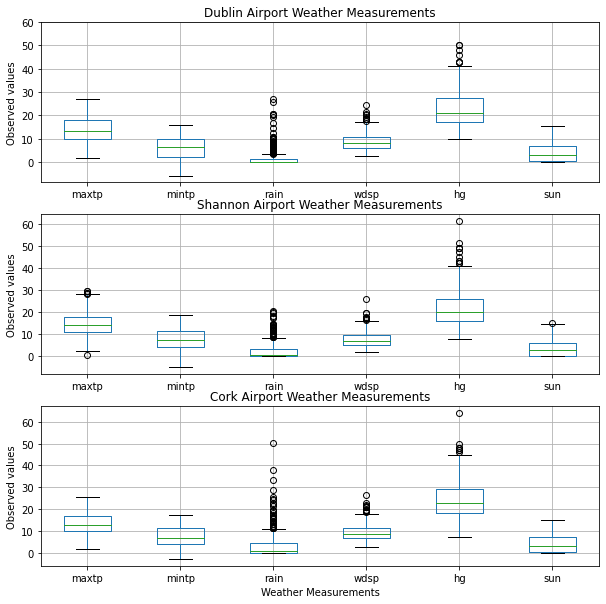

In [28]:
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
weather_df_dublin.drop(columns = ['day','year','temp_diff']).boxplot()
plt.ylabel('Observed values')
plt.title('Dublin Airport Weather Measurements')
plt.yticks([0,10,20,30,40,50,60])
plt.subplot(3,1,2)
weather_df_shannon.drop(columns = ['day','year','temp_diff']).boxplot()
plt.ylabel('Observed values')
plt.title('Shannon Airport Weather Measurements')
plt.yticks([0,10,20,30,40,50,60])
plt.subplot(3,1,3)
weather_df_cork.drop(columns = ['day','year','temp_diff']).boxplot()
plt.xlabel('Weather Measurements')
plt.ylabel('Observed values')
plt.title('Cork Airport Weather Measurements')
plt.yticks([0,10,20,30,40,50,60])

<b>Step 4 <br> Discussion of plot</b><br><br>

I have scaled my yticks in all boxplots, so that we are looking at the same measurements.
Let us go through over all the weather measurements individually but from the graphical summary it seems that all the locations are having more or less similiar weather conditions with minute differences.<br>

<br>Maximum air temperature - All stations appear to experience the same maximal air temperature but Shannon airport has some outliers indicating that at some days this Airport experienced more maximal air temperature than 1.5 times the InterQuartile Range(difference between values of 1st and 3rd Quartiles) and even lower maximal air temperature than 1.5 times the InterQuartile Range. Only Shannon Airport has these outliers. (Outliers are datapoints showing extreme observed values)<br>

<br>Minimum air temperature - All the station seems to have experience very similiar Minimal air temperature, the mean of observations is around 6-7 C (Celsius) 

<br>Precipitation amount - There appears to be huge difference in amount of rain received in each Airport, till the 2nd Quartile data seems to be compact but after crossing the 2nd quartile, the rest of the observations seems to be far spread out. With Shannon Airport receiving largest amount of rain - 20.7mm, following Dublin Airport which received the largest amount of rain up to 26.9mm following Cork Airport that got the highest amount of rainfall - 50.1mm. Cork Airport seems to have experienced highest rain fall and Shannon Airport the least and Dublin Airport taking the intermediate position.<br>

<br>Mean Wind Speed - Maximum of Mean Wind Speed seems less than 30 knots for all stations stating all of them received very similiar Mean Wind Speed between 7-9 knots on average  

<br>Highest Gust - Looking at the boxplots there only seems very few differences, if we look at the numerical summary we can understand that all stations had highest gust usually between 21-24 knots but Cork Airport seems to have experienced more powerful gusts than other stations equivalent to 64knots. The difference after 2nd quartile suggests that Cork Airport has experienced more varied gust than Shannon and Dublin Airport which seem to have experienced overall compact variation in highest gust, but Shannon Airport got highest gust as 61knots compared to Dublin having 50knots.<br>

<br>Sunshine Duration - All the airports seem to have gotten very similiar spread in duration of sunshine, around 3-4hrs per day. (Since our temporal resolution is day), Shannon Airport seems to have observed a bit less sunny days than other airports but more or less all of them have observed similiar duration.<br><br>

Although we can see similarity in some weather measurements. it is also imortant we check the non weather measurement parameters like days,months and Years. This would give us an idea of whether the similiar observations are made for same months or over different months.<br><br>

For example I am going to look at the duration of sunshine based on months received at these stations

Text(0.5, 1.0, 'Difference in sunshine based on months')

<Figure size 432x288 with 0 Axes>

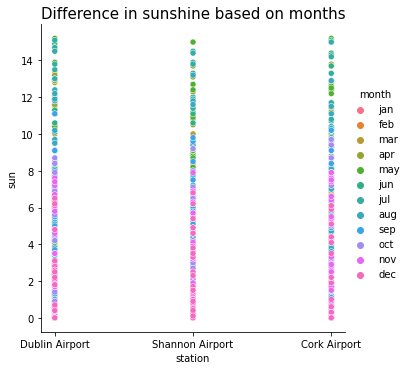

In [37]:
plt.figure()
sns.relplot(x = 'station', y = 'sun', hue = 'month', data = weather_df)
plt.title('Difference in sunshine based on months',fontsize =15)

In this graph we can observe that the observations seems to have same value over similiar months, we can use this method for other columns too.